In [ ]:
"""
• OVERVIEW

Project: Predicting House Prices
--------------------------------
Objective: Predict house prices based on features like size, location, and number of rooms.

• Dataset: Boston Housing Dataset or any similar dataset.
• Algorithm: Linear Regression.
• Evaluation: Mean Squared Error (MSE), R² score. 
"""

# Step 1: Data Preparation

In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the Boston Housing dataset
try:
    from sklearn.datasets import load_boston
    boston = load_boston()
    df = pd.DataFrame(boston.data, columns=boston.feature_names)
    df['MEDV'] = boston.target  # MEDV is the target variable (median house value)
except ImportError:
    print("Boston dataset not found.\nWe are using HousingData.csv")

    data = pd.read_csv("./HousingData.csv")
    df = pd.DataFrame(data)

Boston dataset not found.
We are using HousingData.csv


In [5]:
# Showing DataFrame
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [14]:
# Check for Missing Values
print(data.isnull().sum())

# Replace missing values with the column's mean/median, here we are doing with Mean.
data.fillna(data.mean(), inplace=True)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [15]:
# Split Features and Target
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [16]:
# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 2: Exploratory Data Analysis (EDA)

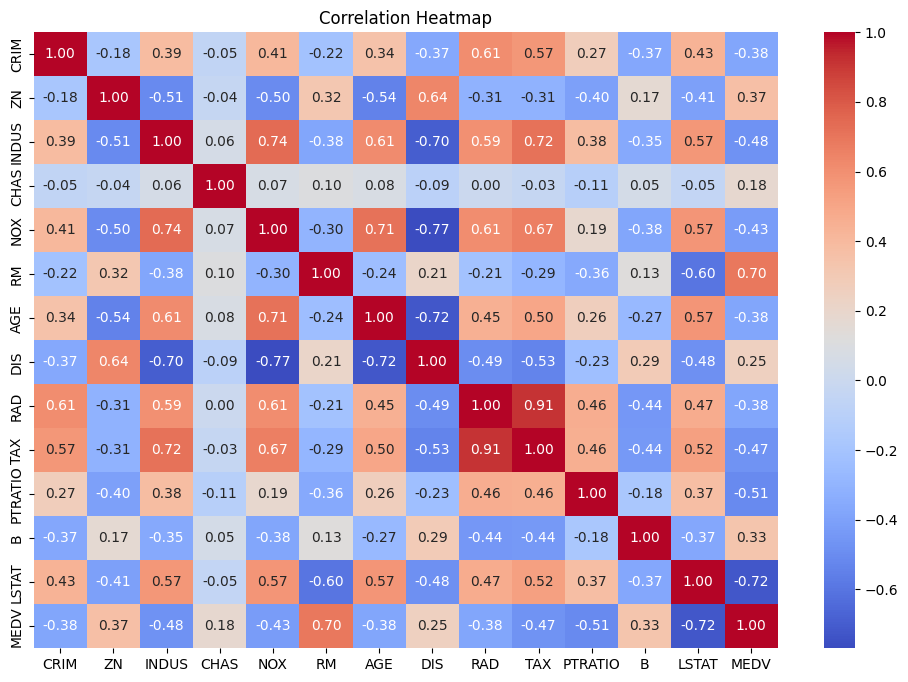

In [17]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

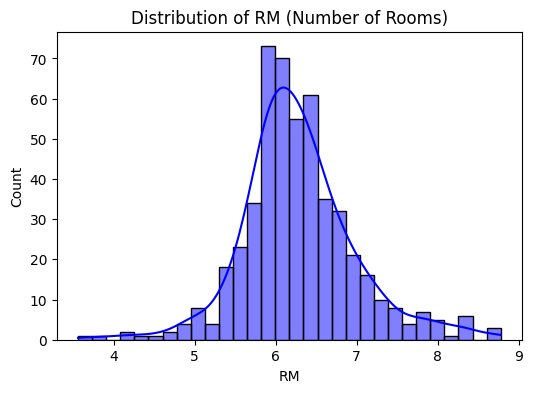

In [18]:
# Univariate Analysis
plt.figure(figsize=(6, 4))
sns.histplot(data['RM'], kde=True, bins=30, color='blue')
plt.title('Distribution of RM (Number of Rooms)')
plt.show()

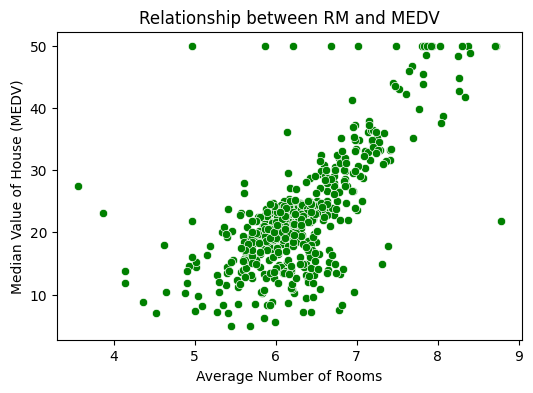

In [19]:
# Bivariate Analysis
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['RM'], y=data['MEDV'], color='green')
plt.title('Relationship between RM and MEDV')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of House (MEDV)')
plt.show()

In [20]:
# Check Multicollinearity with Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,CRIM,2.021270
1,ZN,2.690726
2,INDUS,13.582348
3,CHAS,1.149619
4,NOX,70.613690
5,RM,75.301103
6,AGE,19.805308
7,DIS,13.833517
8,RAD,15.094122
9,TAX,60.597824


# Step 3: Model Development

In [21]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make Predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
# Print Evaluation Metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 25.02
R² Score: 0.66


# Step 4: Model Interpretation and Insights

In [27]:
# Analyze Model Coefficients
print("Feature Importance (Coefficients):")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)

Feature Importance (Coefficients):
    Feature  Coefficient
5        RM     4.752410
3      CHAS     3.240673
8       RAD     0.222823
1        ZN     0.029016
11        B     0.012263
9       TAX    -0.009151
6       AGE    -0.019520
2     INDUS    -0.027133
0      CRIM    -0.114140
12    LSTAT    -0.438440
10  PTRATIO    -0.886045
7       DIS    -1.521593
4       NOX   -16.017543


In [28]:
# Residual Analysis
residuals = y_test - y_pred

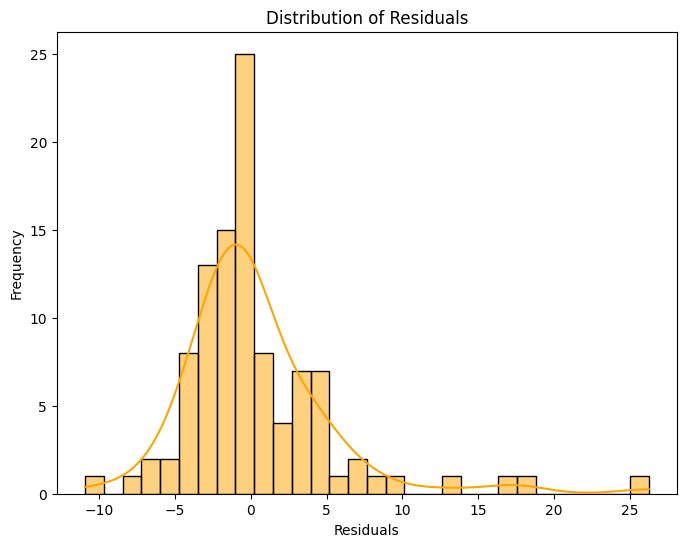

In [29]:
# Plot Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

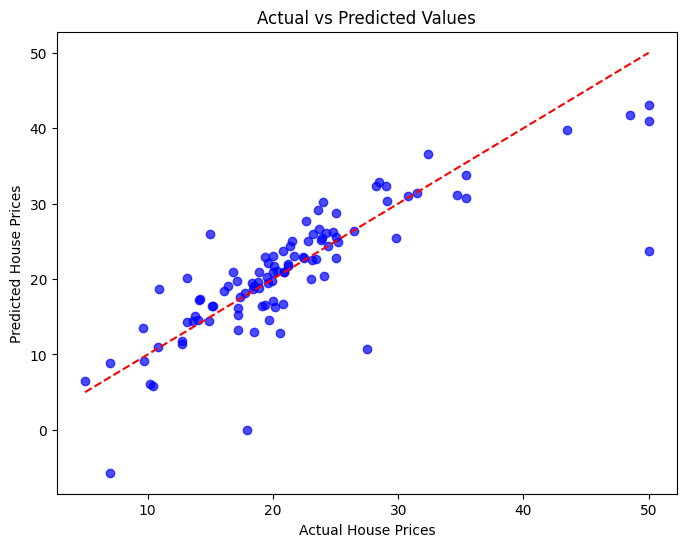

In [30]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

In [31]:
# Additional Insights: Mean of Residuals
print(f"Mean of Residuals: {np.mean(residuals):.2f}")
print("If residuals are centered around zero, it suggests no systematic error.")

Mean of Residuals: 0.36
If residuals are centered around zero, it suggests no systematic error.


# Step 5: Refinements and Enhancements

In [32]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score

In [33]:
# Ridge Regression (L2 Regularization)
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Different penalty strengths
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X_train, y_train)
print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge R² Score: {ridge_grid.best_score_:.2f}")

Best Ridge Alpha: 0.01
Ridge R² Score: 0.71


In [34]:
# Lasso Regression (L1 Regularization)
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Different penalty strengths
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)
print(f"Best Lasso Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso R² Score: {lasso_grid.best_score_:.2f}")


Best Lasso Alpha: 0.01
Lasso R² Score: 0.71


In [35]:
# Cross-Validation for Linear Regression
cv_scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean():.2f}")

Cross-Validation R² Scores: [ 0.65867092  0.71840858  0.5474265   0.07544069 -0.29228475]
Mean R² Score: 0.34


# Step 6: Final Steps

# Step 6.1: Compare Model Performances

In [36]:
# Evaluate Ridge and Lasso on Test Set
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

In [37]:
ridge_pred = best_ridge.predict(X_test)
lasso_pred = best_lasso.predict(X_test)

In [38]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)


In [39]:
# Displaying Model performance comparisons

print("Model Comparison:")
print(f"Linear Regression - MSE: {mse:.2f}, R²: {r2:.2f}")
print(f"Ridge Regression - MSE: {ridge_mse:.2f}, R²: {r2_score(y_test, ridge_pred):.2f}")
print(f"Lasso Regression - MSE: {lasso_mse:.2f}, R²: {r2_score(y_test, lasso_pred):.2f}")

Model Comparison:
Linear Regression - MSE: 25.02, R²: 0.66
Ridge Regression - MSE: 25.02, R²: 0.66
Lasso Regression - MSE: 25.04, R²: 0.66


# Step 6.2: Save the Best Model

In [40]:
import joblib

In [43]:
# Choose the best model (for example: Lasso performs best)
joblib.dump(best_ridge, "best_house_price_model.pkl")
print("Best model saved as 'best_house_price_model.pkl'")

Best model saved as 'best_house_price_model.pkl'


# Test the model (Deployment example)

In [53]:
def predict_house_price(input_features):
    """
    Load the model and predict house prices.
    :param input_features: List or array of features (e.g., [CRIM, ZN, INDUS, ..., LSTAT])
    :return: Predicted house price
    """
    try:
        model = joblib.load("best_house_price_model.pkl")
        prediction = model.predict([input_features])
        return prediction[0]
    except FileNotFoundError:
        print("ModelNotFound: 'best_house_price_model.pkl' is not in location (!missing file)")

In [55]:
# Example Prediction
example_features = [0.02, 0, 7.07, 0, 0.469, 6.5, 68, 3.5, 2, 300, 15, 390, 10]  # Example feature set
predicted_price = predict_house_price(example_features)

In [56]:
print(f"For given input here,")
print(f"Predicted House Price: ${predicted_price:.2f}")

For given input here,
Predicted House Price: $29.24
